In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [3]:
# Carregando o conjunto de dados
df = pd.read_csv("train.csv")
df.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


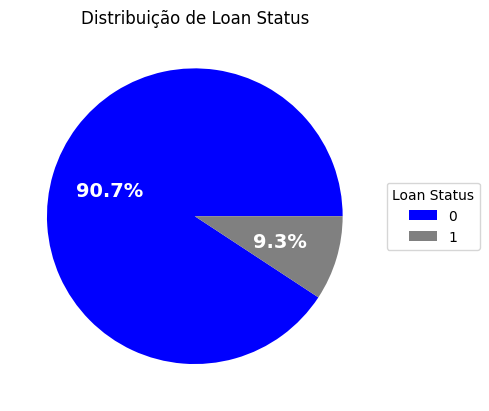

In [4]:
loan_status_counts = df["Loan Status"].value_counts()

# Criar uma lista de cores para cada setor
colors = ['blue', 'grey']

# Criar o gráfico de pizza
plt.pie(loan_status_counts, labels=loan_status_counts.index, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'})

# Adicionar um título
plt.title('Distribuição de Loan Status', fontsize=12)
plt.legend(loan_status_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Mostrar o gráfico
plt.show()

In [22]:
import pandas as pd
df = pd.read_csv("train1.csv")
df.iloc[:, [0] + list(range(9, 11))]

,ID,Home Ownership,Employment Duration
0,65087372,MORTGAGE,176346.62670
1,1450153,RENT,39833.92100
2,1969101,MORTGAGE,91506.69105
3,6651430,MORTGAGE,108286.57590
4,14354669,MORTGAGE,44234.82545
...,...,...,...
67458,16164945,MORTGAGE,83961.15003
67459,35182714,RENT,65491.12817
67460,16435904,MORTGAGE,34813.96985
67461,5300325,OWN,96938.83564


In [23]:
desired_values = ['RENT', 'MORTGAGE', 'OWN']

has_desired_value = any(df.loc[0, 'Home Ownership'] == val for val in desired_values)

if has_desired_value:
    print(df.iloc[:, [0] + list(range(9, 11))])
else:
    df.rename(columns={'Home Ownership': 'Employment DurationAux'}, inplace=True)
    df.rename(columns={'Employment Duration': 'Home Ownership'}, inplace=True)
    df.rename(columns={'Employment DurationAux': 'Employment Duration'}, inplace=True)

    df.to_csv('train1.csv', index=False)





             ID Home Ownership  Employment Duration
0      65087372       MORTGAGE         176346.62670
1       1450153           RENT          39833.92100
2       1969101       MORTGAGE          91506.69105
3       6651430       MORTGAGE         108286.57590
4      14354669       MORTGAGE          44234.82545
...         ...            ...                  ...
67458  16164945       MORTGAGE          83961.15003
67459  35182714           RENT          65491.12817
67460  16435904       MORTGAGE          34813.96985
67461   5300325            OWN          96938.83564
67462  65443173       MORTGAGE         105123.15580

[67463 rows x 3 columns]


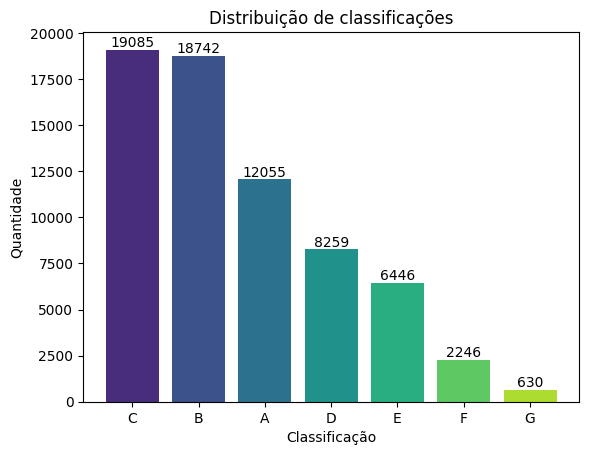

In [7]:
# Contar a ocorrência de cada valor na coluna "Loan Status"
grade_counts = df["Grade"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Classificação")
plt.ylabel("Quantidade")
plt.title("Distribuição de classificações")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

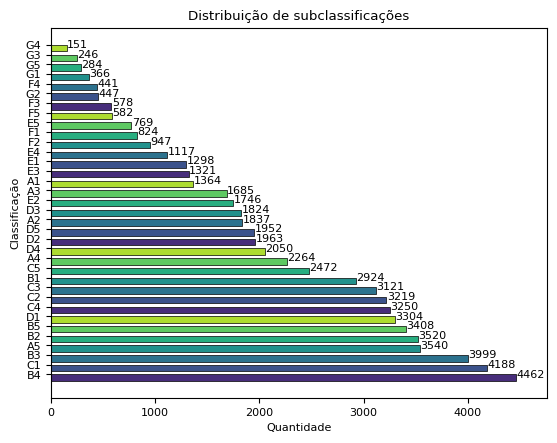

In [8]:
# Ajuste o tamanho da fonte
plt.rcParams.update({'font.size': 8})

# Seu código para obter os dados
grade_counts = df["Sub Grade"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Definir a largura das barras e o espaçamento
bar_width = 0.8  # Largura das barras
bar_spacing = 0.4  # Ajuste o valor para aumentar ou diminuir o espaçamento entre as barras

# Calcular a posição ajustada para cada barra
positions = range(len(grade_counts))
bar_positions = [pos * (bar_width + bar_spacing) for pos in positions]

# Criar o gráfico de barras horizontal com espaçamento
plt.barh(bar_positions, grade_counts, color=colors, height=bar_width, edgecolor='black', linewidth=0.5)

# Adicionar rótulos e título
plt.yticks([pos + bar_width / 2 for pos in bar_positions], grade_counts.index)  # Ajustar posições dos rótulos
plt.xlabel("Quantidade")
plt.ylabel("Classificação")
plt.title("Distribuição de subclassificações")

# Adicionar anotações nas barras
for i, value in zip(bar_positions, grade_counts):
    plt.text(value + 5, i + bar_width / 2, str(value), ha='left', va='center')

# Ajustar os limites do eixo x para acomodar os rótulos
plt.xlim(0, max(grade_counts) + 300)

# Mostrar o gráfico
plt.show()


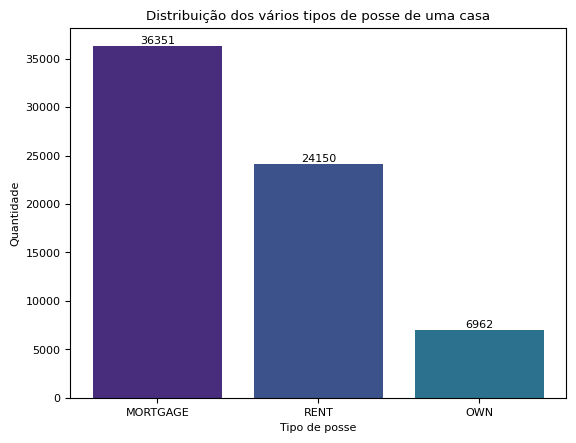

In [9]:
# Contar a ocorrência de cada valor na coluna "Loan Status"
df = pd.read_csv("train1.csv")
grade_counts = df["Home Ownership"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Tipo de posse")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários tipos de posse de uma casa")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

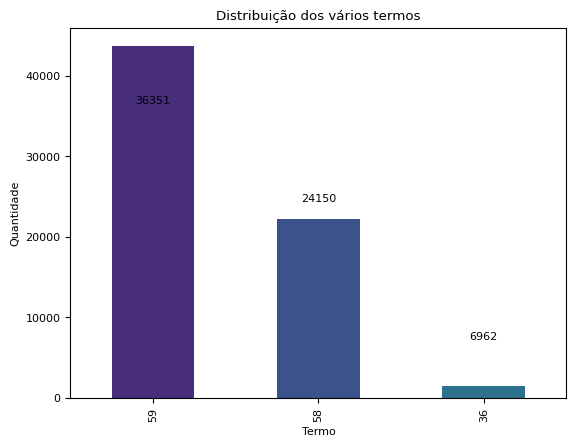

In [10]:
df["Term"].value_counts().plot.bar(color=colors)
colors = sns.color_palette("viridis", 7)
plt.xlabel("Termo")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários termos")
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

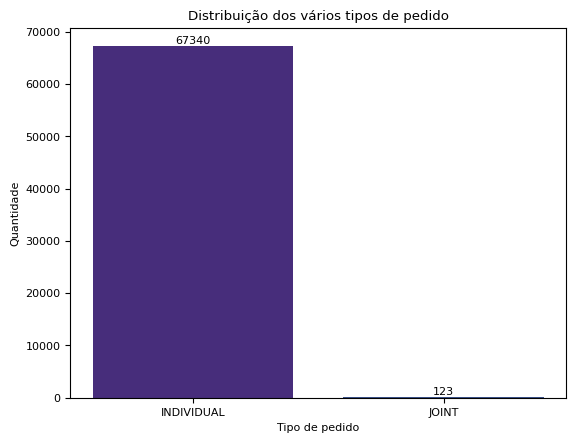

In [11]:
grade_counts = df["Application Type"].value_counts()

# Criar uma lista de cores para cada barra
colors = sns.color_palette("viridis", 7)

# Criar o gráfico de barras
plt.bar(grade_counts.index, grade_counts, color=colors)

# Adicionar rótulos e título
plt.xlabel("Tipo de pedido")
plt.ylabel("Quantidade")
plt.title("Distribuição dos vários tipos de pedido")

# Adicionar anotações nas barras
for i, value in enumerate(grade_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Mostrar o gráfico
plt.show()

In [12]:
df = pd.read_csv("train1.csv")

# Removendo a coluna 'ID'
df = df.drop(columns=['ID'])

# Salvando o DataFrame resultante em um novo arquivo CSV
df.to_csv("train_without_id.csv", index=False)

# Exibindo as primeiras linhas do DataFrame resultante
print("Primeiras 5 linhas do conjunto de dados sem a coluna 'ID':")
print(df.head())
# Exibindo a coluna 'Term Batch'



Primeiras 5 linhas do conjunto de dados sem a coluna 'ID':
   Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
0        10000          32236             12329.36286    59     BAT2522922   
1         3609          11940             12191.99692    59     BAT1586599   
2        28276           9311             21603.22455    59     BAT2136391   
3        11170           6954             17877.15585    59     BAT2428731   
4        16890          13226             13539.92667    59     BAT5341619   

   Interest Rate Grade Sub Grade Home Ownership  Employment Duration  ...  \
0      11.135007     B        C4       MORTGAGE         176346.62670  ...   
1      12.237563     C        D3           RENT          39833.92100  ...   
2      12.545884     F        D4       MORTGAGE          91506.69105  ...   
3      16.731201     C        C3       MORTGAGE         108286.57590  ...   
4      15.008300     C        D4       MORTGAGE          44234.82545  ...   

    Recov

In [13]:
# Exibindo a coluna 'Term' e contando valores únicos
print("Coluna 'Payment Plan':")
print(df['Payment Plan'])
df = df.drop(columns=['Payment Plan'])
df = df.drop(columns=['Accounts Delinquent'])
df = df.drop(columns=['Batch Enrolled'])
# Contando o número de valores únicos na coluna 'Term'
num_unique_terms = df['Payment Plan'].nunique()
print(num_unique_terms)


Coluna 'Payment Plan':
0        n
1        n
2        n
3        n
4        n
        ..
67458    n
67459    n
67460    n
67461    n
67462    n
Name: Payment Plan, Length: 67463, dtype: object


KeyError: 'Payment Plan'

In [ ]:
# Configurando o Pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

#
print(df.head())


   Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
0        10000          32236             12329.36286    59     BAT2522922   
1         3609          11940             12191.99692    59     BAT1586599   
2        28276           9311             21603.22455    59     BAT2136391   
3        11170           6954             17877.15585    59     BAT2428731   
4        16890          13226             13539.92667    59     BAT5341619   

   Interest Rate Grade Sub Grade Home Ownership  Employment Duration  \
0      11.135007     B        C4       MORTGAGE         176346.62670   
1      12.237563     C        D3           RENT          39833.92100   
2      12.545884     F        D4       MORTGAGE          91506.69105   
3      16.731201     C        C3       MORTGAGE         108286.57590   
4      15.008300     C        D4       MORTGAGE          44234.82545   

  Verification Status Payment Plan               Loan Title  Debit to Income  \
0        Not Verif

In [ ]:
df['Loan Title'] = df['Loan Title'].str.lower()
len(df['Loan Title'].unique())
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'green loan', 'other',
       'moving and relocation', 'credit cards', 'medical expenses',
       'refinance', 'credit card consolidation', 'lending club',
       'debt consolidation loan', 'major purchase', 'vacation',
       'business', 'credit card payoff', 'credit card',
       'credit card refi', 'personal loan', 'cc refi', 'consolidate',
       'medical', 'loan 1', 'consolidation', 'card consolidation',
       'car financing', 'debt', 'home buying', 'freedom', 'consolidated',
       'get out of debt', 'consolidation loan', 'dept consolidation',
       'personal', 'cards', 'bathroom', 'refi', 'credit card loan',
       'credit card debt', 'house', 'debt consolidation 2013',
       'debt loan', 'cc refinance', 'home', 'cc consolidation',
       'credit card refinance', 'credit loan', 'payoff',
       'bill consolidation', 'credit card paydown', 'credit card pay off',
       'g

In [ ]:
map_dict = {'Loan Title':{'debt consolidation':'debt consolidation', \
                'debt consolidation loan':'debt consolidation', \
                'debt consolidation 2013':'debt consolidation', \
                'dept consolidation':'debt consolidation' ,
                'credit card refinancing':'credit card refinancing', \
                'refinance':'credit card refinancing', \
                'cc refinance':'credit card refinancing',\
                'credit card refinance':'credit card refinancing',\
                'cc-refinance':'credit card refinancing', \
                'refinance loan':'credit card refinancing', \
                'credit card refinance loan':'credit card refinancing',\
                'credit card refi':'credit card refinancing', \
                'cc refi':'credit card refinancing', \
                'refi':'credit card refinancing'  ,
                'home improvement':'home improvement',\
                'home improvement loan':'home improvement',\
                'bathroom':'home improvement',\
                'pool':'home improvement' ,
                'home buying':'home buy',\
                'house':'home buy',\
                'home':'home buy',\
                'home loan':'home buy' ,
                'credit consolidation':'credit consolidation',\
                'consolidation loan':'credit consolidation',\
                'cc consolidation':'credit consolidation',\
                'conso':'credit consolidation',\
                'credit card consolidation':'credit consolidation',\
                'card consolidation':'credit consolidation',\
                'loan consolidation':'credit consolidation',\
                'consolidate':'credit consolidation',\
                'consolidated':'credit consolidation' ,
                'medical':'medical purpose',\
                'medical expenses':'medical purpose',\
                'medical loan':'medical purpose'  ,
                'lending club' : 'lending purpose' , \
                'lending loan' : 'lending purpose'  ,
                'business' : 'business purpose' , \
                'green loan' : 'business purpose' , \
                'moving and relocation' : 'business purpose'  , \
                'credit cards' : 'credit cards payoff' , \
                'credit card' : 'credit cards payoff' , \
                'credit card loan' : 'credit cards payoff' , \
                'credit' : 'credit cards payoff' , \
                'credit card debt' : 'credit cards payoff' , \
                'cc loan' : 'credit cards payoff' , \
                'cc' : 'credit cards payoff' , \
                'cards' : 'credit cards payoff' , \
                'credit card payoff' : 'credit cards payoff' , \
                'credit pay off' : 'credit cards payoff' , \
                'credit payoff' : 'credit cards payoff' , \
                'credit loan' : 'credit cards payoff' , \
                'payoff' : 'credit cards payoff' , \
                'pay off' : 'credit cards payoff' , \
                'credit card paydown' : 'credit cards payoff' , \
                'credit card pay off' : 'credit cards payoff' ,
                'personal loan' : 'perosonal purpose' , \
                'personal' : 'perosonal purpose' , \
                'wedding loan' : 'perosonal purpose' , \
                'getting ahead' : 'perosonal purpose' , \
                'vacation' : 'perosonal purpose' , \
                'major purchase' : 'perosonal purpose'  , \
                'car financing' : 'vehicle purpose' , \
                'car loan' : 'vehicle purpose' , \
                'debt' : 'debt payoff' , \
                'get out of debt' : 'debt payoff' , \
                'debt loan' : 'debt payoff' , \
                'get debt free' : 'debt payoff' , \
                'debt payoff' : 'debt payoff' , \
                'debt free' : 'debt payoff' , \
                'freedom' : 'debt payoff' , \
                'relief' : 'debt payoff' , \
                'debt reduction' : 'debt payoff' , \
                'bill consolidation' : 'bill payoff' , \
                'bill payoff' : 'bill payoff' , \
                'pay off bills' : 'bill payoff' , \
                'bills' : 'bill payoff'  , \
                'other' : 'other purpose' , \
                'loan 1' : 'other purpose' , \
                'loan1' : 'other purpose' , \
                'loan' : 'other purpose' , \
                'myloan' : 'other purpose' , \
                'my loan' : 'other purpose' }
            }

In [ ]:

df.replace(map_dict, inplace=True)
len(df['Loan Title'].unique())


15

In [ ]:
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'business purpose',
       'other purpose', 'credit cards payoff', 'medical purpose',
       'lending purpose', 'perosonal purpose', 'consolidation',
       'vehicle purpose', 'debt payoff', 'home buy', 'bill payoff'],
      dtype=object)

In [ ]:

colunas = ['Employment Duration', 'Interest Rate', 'Inquires - six months', 'Total Accounts',
               'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 
               'Collection Recovery Fee', 'Collection 12 months Medical', 
               'Total Collection Amount', 'Total Revolving Credit Limit']

#Loop em relação as features
for coluna in colunas:
  Q1 = df[coluna].quantile(q = 0.25) #Definindo o primeiro quartil
  Q3 = df[coluna].quantile(q = 0.75) #Definindo o segundo quartil
  IQR = Q3 - Q1 #Definindo o interquartil
  superior = Q3 + IQR  #Definindo o Limite Superior
  inferior = Q1 - IQR #Definindo o Limite Inferior

  #Eliminando os outliers acima do limite superior
  df.drop( df.loc[ df[coluna] > superior ].index, axis = 0, inplace = True )

  #Eliminando os outliers abaixo do limite inferior
  df.drop( df.loc[ df[coluna] < inferior ].index, axis = 0, inplace = True )

In [ ]:
unicos = df.nunique()

# Filtra as colunas que têm apenas um valor único
colunas_valor_unico = unicos[unicos == 1].index

# Exibe os nomes das colunas com um valor único
list(colunas_valor_unico)

['Payment Plan',
 'Inquires - six months',
 'Collection 12 months Medical',
 'Accounts Delinquent']

In [ ]:
df.drop(['Collection 12 months Medical', 'Inquires - six months'], axis = 1, inplace = True)
print(df.head())

    Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
1          3609          11940            12191.996920    59     BAT1586599   
7         20744          10609             7645.014802    58     BAT2558388   
8          9299          11238            13429.456610    59     BAT5341619   
9         19232           8962             7004.097481    58     BAT2078974   
11        16581           8767            10637.049030    59     BAT2333412   

    Interest Rate Grade Sub Grade Home Ownership  Employment Duration  \
1       12.237563     C        D3           RENT          39833.92100   
7       13.993688     A        A5            OWN          61723.52014   
8       11.178457     G        C2       MORTGAGE          63205.09072   
9        5.520413     C        B5           RENT          42015.46586   
11       9.535988     A        D4       MORTGAGE          39605.50605   

   Verification Status Payment Plan               Loan Title  Debit to Income  \
1    

In [ ]:
X = df.drop(['Loan Status'], axis = 1)
y = df['Loan Status']

In [ ]:
print(df.head())

#Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler()

# #Balanceando a amostra
X_train, y_train = rus.fit_resample(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, 
                                                    y_train, 
                                                    shuffle = True, 
                                                    stratify = y_train,
                                                    random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=10)  # Escolha o número desejado de vizinhos



         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Home Ownership  \
0     BAT2522922      11.135007     B        C4       MORTGAGE   
1     BAT1586599      12.237563     C        D3           RENT   
2     BAT2136391      12.545884     F        D4       MORTGAGE   
3     BAT2428731      16.731201     C        C3       MORTGAGE   
4     BAT5341619      15.008300     C        D4       MORTGAGE   

   Employment Duration Verification Status Payment Plan  \
0         176346.62670        Not Verified            n   
1          39833.92100     Source Verified    

In [ ]:
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia: {accuracy}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)


ValueError: could not convert string to float: 'BAT1104812'

In [ ]:

# Criando o modelo SVM
svm_model = SVC(kernel='linear')  # Você pode ajustar o kernel conforme necessário

# Treinando o modelo SVM
svm_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliando o desempenho do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Exibindo os resultados do modelo SVM
print("Resultados do Modelo SVM:")
print(f"Acurácia: {accuracy_svm}")
print("\nMatriz de Confusão:")
print(conf_matrix_svm)
print("\nRelatório de Classificação:")
print(class_report_svm)
